# Comparing classification performance of LDA, KNN and SVM

#### We are randomly generating multivariate normal datasets of different variances and are comparing the performance of Linear Discriminant Analysis, K-Nearest Neighbours and Support Vector Machine

## Importing packages

In [1]:
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal as mvn
from numpy.linalg import inv
import random
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Defining function to simulate training, test data and to perform LDA

In [2]:
#Function for simulating training data
def simdata(n, sig, mu0 = [0,0], mu1 = [1,1]):
    #mu0 = [0,0]
    #mu1 = [1,1]
    cov = sig * np.array([[1, 0.2], [0.2, 1]])
    n0 = int(n/2)
    n1 = int(n/2)
    X0 = mvn(mu0, cov, n0)
    X1 = mvn(mu1, cov, n1)
    return(X0, X1)

#Function for simulating test data
def simtest(n, sig, mu0 = [0,0], mu1 = [1,1]):
    #mu0 = [0,0]
    #mu1 = [1,1]
    cov = sig * np.array([[1, 0.2], [0.2, 1]])
    n0 = int(n/2)
    n1 = int(n/2)
    X0 = mvn(mu0, cov, n0)
    X1 = mvn(mu1, cov, n1)
    X = np.vstack((X0, X1))
    Y= np.zeros(n0)
    Y = np.hstack((Y, np.ones(n1)))
    return(X, Y)

#Function for performing Linear Discriminant Analysis
def lda(X0, X1):
    m0 = np.mean(X0, axis=0)
    m1 = np.mean(X1, axis=0)
    n0 = X0.shape[0]
    n1 = X1.shape[0]
    #pooled covariance
    S = (n0*np.cov(X0, rowvar=False)+n1*np.cov(X1, rowvar=False))/(n0+n1-2)
    Si = inv(S)
    a = Si@(m1-m0)
    b = 0.5*(m0-m1)@Si@(m0+m1)
    return(a,b)
    

## Calculating prediction error for 1000 randomly generated training and test data for the same mean and variance using LDA

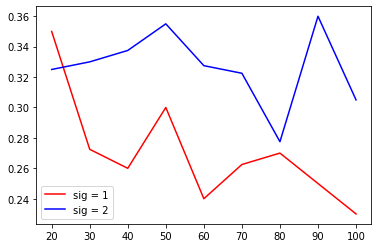

In [26]:
#Calculating average error for 1000 training sets with LDA
sig = 1
#n = 50 sample size
test_size = 400
cols = ['r','b']
error_sample = {}
for sig in np.arange(1,3,1):
    for n in np.arange(20,110,10):
        for i in range(1000):
            test_error = []
            X0,X1 = simdata(n, sig) #Creating Training data
            a,b = lda(X0,X1) #Parameter estimation for training data

            Xt0, Xt1  = simdata(test_size, sig) #Creating Testing data
            err = (np.sum(Xt0@a+b>0)+np.sum(Xt1@a+b<=0))/test_size #Error estimation
            test_error.append(err)
        avg_error = np.average(test_error)
        error_sample[n] = avg_error
    plt.plot([i for i in error_sample.keys()], [i for i in error_sample.values()],cols[sig-1])
    plt.legend(['sig = 1', 'sig = 2'])
plt.show()
    

#### Red line is the error in predicting data with variance 1 and blue line corresponds to variance 2

## Plotting prediction error using KNN

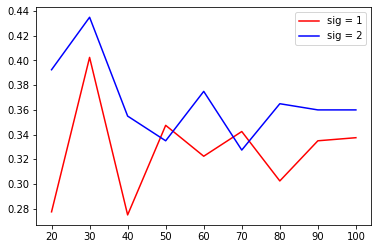

In [27]:
#Calculating average error for 1000 training sets with 3NN
knn = KNeighborsClassifier(n_neighbors=3)
test_size = 400
cols = ['r','b']
error_sample_knn = {}
for sig in np.arange(1,3,1):
    for n in np.arange(20,110,10):
        for i in range(1000):
            test_error = []
            X,Y = simtest(n, sig) #Creating Training data
            knn.fit(X,Y)

            Xt, Yt  = simtest(test_size, sig) #Creating Testing data
            accuracy = knn.score(Xt, Yt)
            test_error.append(1 - accuracy)
        avg_error = np.average(test_error)
        error_sample_knn[n] = avg_error
    plt.plot([i for i in error_sample_knn.keys()], [i for i in error_sample_knn.values()],cols[sig-1])
    plt.legend(['sig = 1', 'sig = 2'])
plt.show()

#### Red line is the error in predicting data with variance 1 and blue line corresponds to variance 2

## Plotting prediction error using SVM

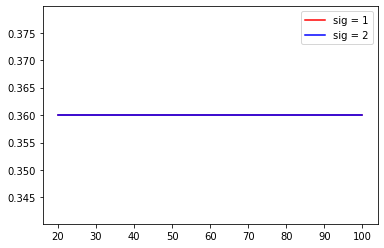

In [28]:
#Calculating average error for 1000 training sets with SVM
clf = SVC(C=1, kernel= 'linear', probability= True)
test_size = 400
cols = ['r','b']
error_sample_svm = {}
for sig in np.arange(1,3,1):
    for n in np.arange(20,110,10):
        for i in range(1000):
            test_error = []
            X,Y = simtest(n, sig) #Creating Training data
            clf.fit(X,Y)

            Xt, Yt  = simtest(test_size, sig) #Creating Testing data
            accuracy = clf.score(Xt, Yt)
            test_error.append(1 - accuracy)
        avg_error_svm = np.average(test_error)
        error_sample_svm[n] = avg_error
    plt.plot([i for i in error_sample_svm.keys()], [i for i in error_sample_svm.values()],cols[sig-1])
    plt.legend(['sig = 1', 'sig = 2'])
plt.show()

#### Red line is the error in predicting data with variance 1 and blue line corresponds to variance 2